In [2]:
!pip install pandas
!pip install matplotlib
!pip install sklearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as regression

In [4]:
data = pd.read_csv('/media/raghavgupta/New Volume/courses/data Science/2. Predict Movie Box Office Revenue with Linear Regression/dirtyData.csv')

In [5]:
data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($),Unnamed: 6
0,4840,6/1/2012,The Devil Inside,"$1,000,000","$101,759,490","$53,262,945",NaN
1,4841,7/10/1963,Tom Jones,"$1,000,000","$37,600,000","$37,600,000",NaN
2,4842,4/17/2015,Unfriended,"$1,000,000","$62,561,449","$32,482,090",NaN
3,4843,8/2/1976,Taxi Driver,"$1,000,000","$28,316,211","$28,262,574",NaN
4,4844,5/24/2006,An Inconvenient Truth,"$1,000,000","$52,769,915","$24,146,161",NaN


In [6]:
#here we are cleaning our data ie removing , and $ from our data and convertinf it to integral values
budget = []
earning = []
for i in data['Production Budget ($)']:
    temp = ''
    for j in i:
        if(j==',' or j=='$'):
            continue
        else:
            temp+=j
#     budget.append(temp)
    budget.append(int(temp))
for i in data['Worldwide Gross ($)']:
    temp = ''
    for j in i:
        if(j==',' or j=='$'):
            continue
        else:
            temp+=j
#     budget.append(temp)
    earning.append(int(temp))
budget = np.asanyarray(budget)
earning = np.asanyarray(earning)

In [7]:
#till this point, we have an array named budget and earning with all the clean data

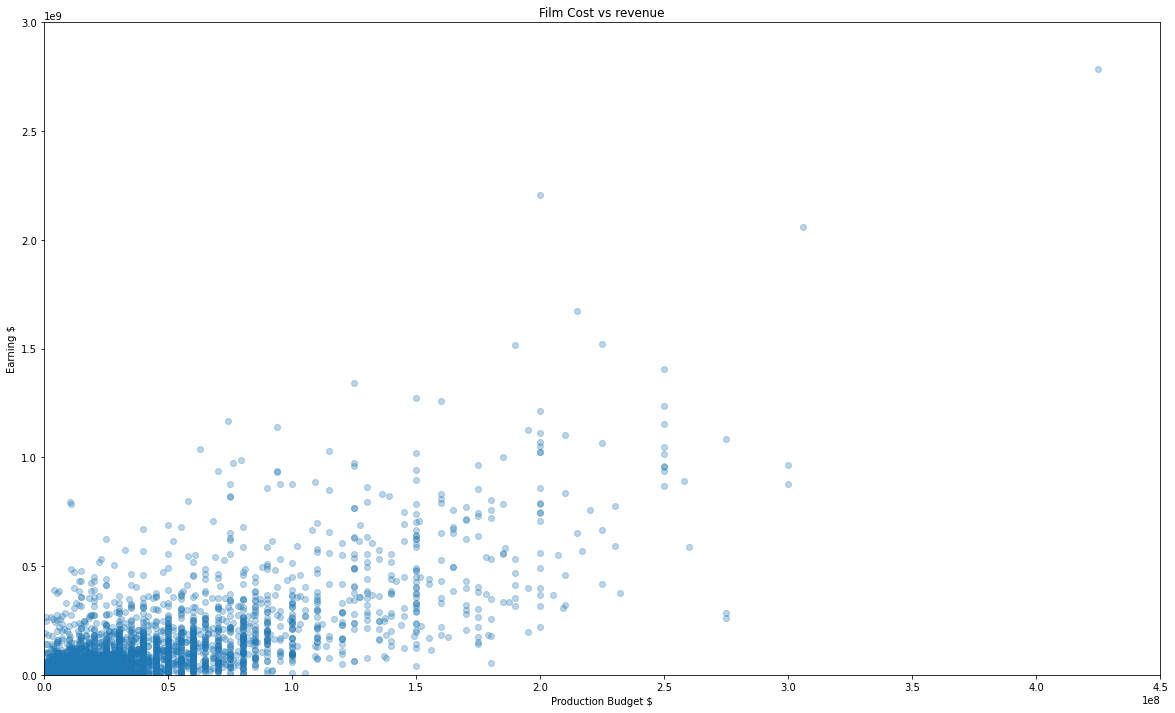

In [8]:
plt.figure(figsize=(20,12))
plt.scatter(budget,earning,alpha=0.3) # budget is on x axis and earning is on y axis
plt.title("Film Cost vs revenue")
plt.xlabel("Production Budget $")
plt.ylabel("Earning $")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()
# plt.axes('Earning','Movie Budget')

In [9]:
# Till now we have analyised from the above chart that movies with smaller budget have less revenue
# Now Lets Start with our prediction

In [10]:
X = budget
X = X.reshape(-1,1)
y = earning
y = y.reshape(-1,1)
model = regression()
model.fit(X,y)

LinearRegression()

In [11]:
model.coef_  # theta 1 ie our slope

array([[3.1123683]])

In [12]:
model.intercept_ # theta 0 ie our slope intercept

array([-7309994.18355611])

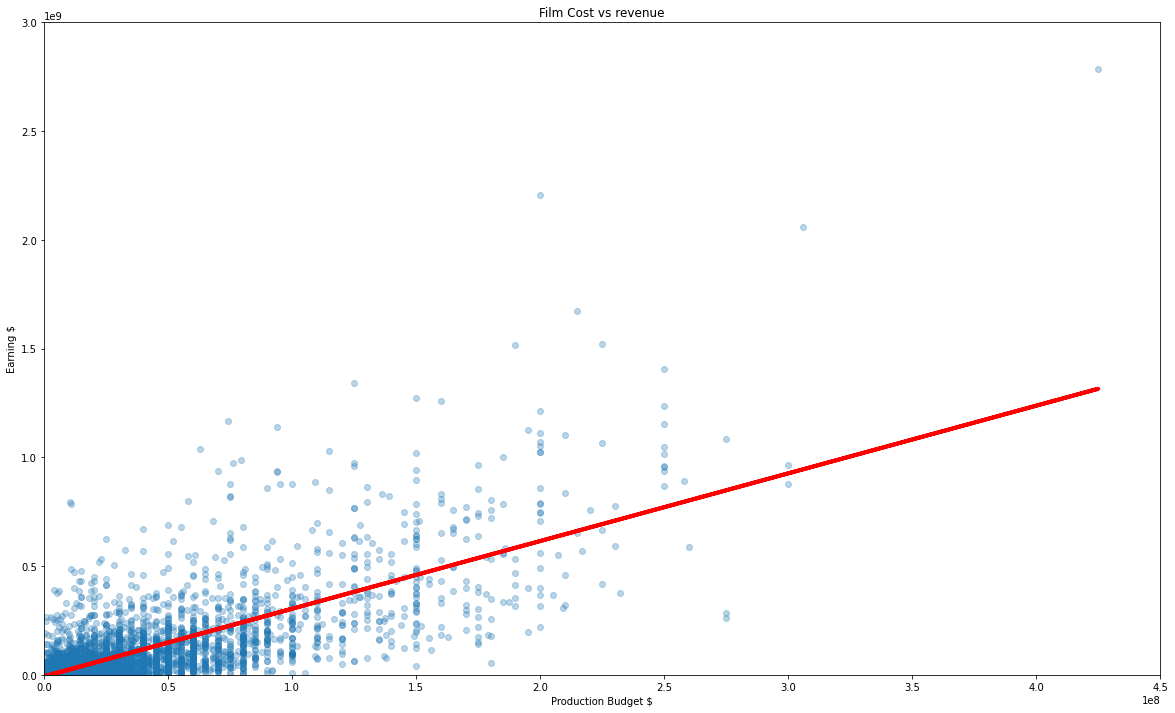

In [13]:
plt.figure(figsize=(20,12))
plt.scatter(budget,earning,alpha=0.3) # budget is on x axis and earning is on y axis
plt.plot(X,model.predict(X),color='red',linewidth=4)
plt.title("Film Cost vs revenue")
plt.xlabel("Production Budget $")
plt.ylabel("Earning $")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()
# plt.axes('Earning','Movie Budget')

In [14]:
model.score(X,y)*100

54.994816283193884

In [15]:
# here we can see that our model is 54.99% accurate. This accuracy would increase as we go on to add more features such as time taken , external factors, etc.